In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import jax

import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

try:
  import flax
except ModuleNotFoundError:
  !pip install --quiet flax
  import flax

try:
  import optax
except ModuleNotFoundError:
  !pip install --quiet optax
  import optax

try:
  import diffrax
except ModuleNotFoundError:
  !pip install --quiet diffrax
  import diffrax

from flax import linen as nn
from flax.training import train_state

from tqdm import trange
from functools import partial

import sys
sys.path.append('wl-mechanics')
import datasets
from sklearn.mixture import GaussianMixture

/ssd003/home/kirill/venvs/jax-env/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(
2023-09-24 14:14:41.176300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /pkgs/cuda-11.8/targets/x86_64-linux/lib:/pkgs/cudnn-8.8/lib:/pkgs/cuda-11.3/lib64:/pkgs/nccl_2.9.9-1+cuda11.3_x86_64:/pkgs/nccl_2.8.3-1+cuda11.0_x86_64/lib:/pkgs/cuda-11.8/targets/x86_64-linux/lib:/pkgs/cudnn-8.8/lib
2023-09-24 14:14:41.176486: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or di

In [3]:
from configs.multi import ot as config
config = config.get_config()

In [5]:
key = random.PRNGKey(0)
key, init_key = random.split(key)
X, _ = datasets.get_data(config, init_key)
loo_ids = list(range(len(X)))
loo_ids.pop(-1)
loo_ids.pop(0)
print(loo_ids)

[1, 2]


In [21]:
t = jnp.arange(10).reshape(-1,1)/10
t_grid = jnp.arange(3)/3
ids = jnp.argmin(jnp.abs(t - t_grid[None,:]), axis=1)

In [22]:
jnp.stack([jnp.ones(3), jnp.ones(3), jnp.ones(3)])[ids]

Array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [6]:
def get_plot(data, n):
  bic = np.zeros(n)
  for i in range(n):
    bic[i] = GaussianMixture(n_components=i+1, random_state=0).fit(data).bic(data)
  return bic

In [7]:
n = 30
bics = np.zeros([len(loo_ids), n])
for i in range(len(loo_ids)):
  loo_i = loo_ids[i]
  bics[i] = get_plot(np.concatenate([X[loo_i-1], X[loo_i+1]], 0), n)

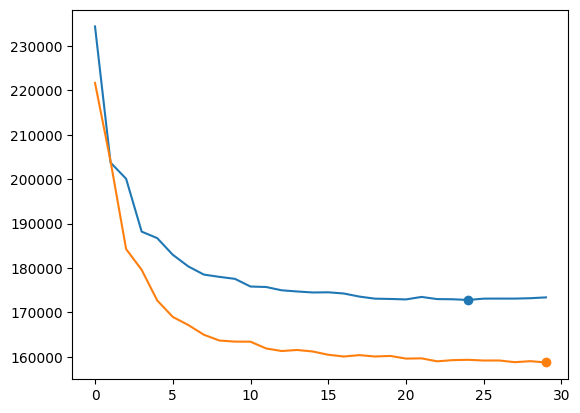

In [8]:
for i in range(len(bics)):
  plt.plot(bics[i], label=loo_ids[i])
  plt.scatter(np.argmin(bics[i]), np.min(bics[i]))

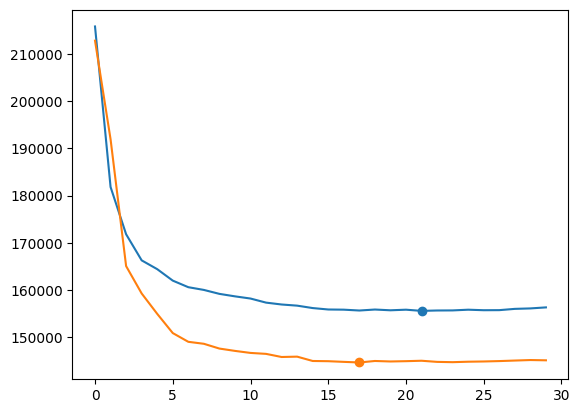

In [ ]:
for i in range(len(bics)):
  plt.plot(bics[i], label=loo_ids[i])
  plt.scatter(np.argmin(bics[i]), np.min(bics[i]))

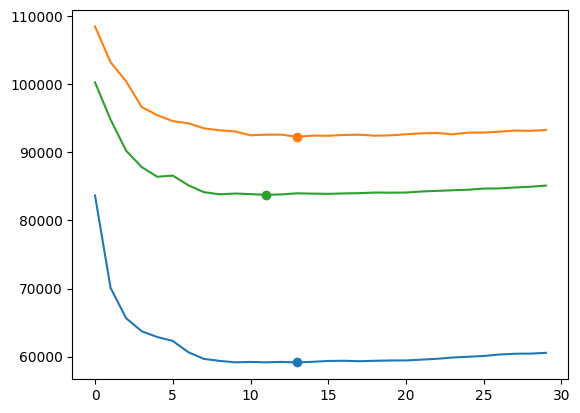

In [ ]:
for i in range(len(bics)):
  plt.plot(bics[i], label=loo_ids[i])
  plt.scatter(np.argmin(bics[i]), np.min(bics[i]))

In [62]:
from scipy.spatial import KDTree

In [65]:
tree = KDTree(X[0])

In [67]:
X[0].shape

(7264, 5)

In [78]:
_, ids = tree.query(np.zeros((2,5)), 10)

In [79]:
ids

array([[4168, 1967,  749, 7243, 4194, 4933,  271, 2300, 4318, 1723],
       [4168, 1967,  749, 7243, 4194, 4933,  271, 2300, 4318, 1723]])

In [80]:
X[0][ids].shape

(2, 10, 5)